In [1]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import RobustScaler , StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [2]:
df_train=pd.read_csv("../Dataset/RavdessAudioOnlyFeatures_TRAIN.csv")
df_test=pd.read_csv("../Dataset/RavdessAudioOnlyFeatures_TEST.csv")

df_train.drop('actor',axis=1,inplace=True)
df_train.drop('filename',axis=1,inplace=True)
df_test.drop('actor',axis=1,inplace=True)
df_test.drop('filename',axis=1,inplace=True)

In [3]:
pd.set_option('display.max_columns', None)
df_train.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_count,sum,mean,std,min,max,q01,q05,q25,q50,q75,q95,q99,kur,skew,lag1_sum,lag1_mean,lag1_std,lag1_min,lag1_max,lag1_q01,lag1_q05,lag1_q25,lag1_q50,lag1_q75,lag1_q95,lag1_q99,lag1_kur,lag1_skew,zc_sum,zc_mean,zc_std,zc_min,zc_max,zc_q01,zc_q05,zc_q25,zc_q50,zc_q75,zc_q95,zc_q99,zc_kur,zc_skew,mfcc_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,mfcc_q01,mfcc_q05,mfcc_q25,mfcc_q50,mfcc_q75,mfcc_q95,mfcc_q99,mfcc_kur,mfcc_skew,sc_sum,sc_mean,sc_std,sc_min,sc_max,sc_q01,sc_q05,sc_q25,sc_q50,sc_q75,sc_q95,sc_q99,sc_kur,sc_skew,stft_sum,stft_mean,stft_std,stft_min,stft_max,stft_q01,stft_q05,stft_q25,stft_q50,stft_q75,stft_q95,stft_q99,stft_kur,stft_skew,length_w1,sum_w1,mean_w1,std_w1,min_w1,max_w1,q01_w1,q05_w1,q25_w1,q50_w1,q75_w1,q95_w1,q99_w1,kur_w1,skew_w1,lag1_sum_w1,lag1_mean_w1,lag1_std_w1,lag1_min_w1,lag1_max_w1,lag1_q01_w1,lag1_q05_w1,lag1_q25_w1,lag1_q50_w1,lag1_q75_w1,lag1_q95_w1,lag1_q99_w1,lag1_kur_w1,lag1_skew_w1,zc_sum_w1,zc_mean_w1,zc_std_w1,zc_min_w1,zc_max_w1,zc_q01_w1,zc_q05_w1,zc_q25_w1,zc_q50_w1,zc_q75_w1,zc_q95_w1,zc_q99_w1,zc_kur_w1,zc_skew_w1,mfcc_sum_w1,mfcc_mean_w1,mfcc_std_w1,mfcc_min_w1,mfcc_max_w1,mfcc_q01_w1,mfcc_q05_w1,mfcc_q25_w1,mfcc_q50_w1,mfcc_q75_w1,mfcc_q95_w1,mfcc_q99_w1,mfcc_kur_w1,mfcc_skew_w1,sc_sum_w1,sc_mean_w1,sc_std_w1,sc_min_w1,sc_max_w1,sc_q01_w1,sc_q05_w1,sc_q25_w1,sc_q50_w1,sc_q75_w1,sc_q95_w1,sc_q99_w1,sc_kur_w1,sc_skew_w1,stft_sum_w1,stft_mean_w1,stft_std_w1,stft_min_w1,stft_max_w1,stft_q01_w1,stft_q05_w1,stft_q25_w1,stft_q50_w1,stft_q75_w1,stft_q95_w1,stft_q99_w1,stft_kur_w1,stft_skew_w1,length_w2,sum_w2,mean_w2,std_w2,min_w2,max_w2,q01_w2,q05_w2,q25_w2,q50_w2,q75_w2,q95_w2,q99_w2,kur_w2,skew_w2,lag1_sum_w2,lag1_mean_w2,lag1_std_w2,lag1_min_w2,lag1_max_w2,lag1_q01_w2,lag1_q05_w2,lag1_q25_w2,lag1_q50_w2,lag1_q75_w2,lag1_q95_w2,lag1_q99_w2,lag1_kur_w2,lag1_skew_w2,zc_sum_w2,zc_mean_w2,zc_std_w2,zc_min_w2,zc_max_w2,zc_q01_w2,zc_q05_w2,zc_q25_w2,zc_q50_w2,zc_q75_w2,zc_q95_w2,zc_q99_w2,zc_kur_w2,zc_skew_w2,mfcc_sum_w2,mfcc_mean_w2,mfcc_std_w2,mfcc_min_w2,mfcc_max_w2,mfcc_q01_w2,mfcc_q05_w2,mfcc_q25_w2,mfcc_q50_w2,mfcc_q75_w2,mfcc_q95_w2,mfcc_q99_w2,mfcc_kur_w2,mfcc_skew_w2,sc_sum_w2,sc_mean_w2,sc_std_w2,sc_min_w2,sc_max_w2,sc_q01_w2,sc_q05_w2,sc_q25_w2,sc_q50_w2,sc_q75_w2,sc_q95_w2,sc_q99_w2,sc_kur_w2,sc_skew_w2,stft_sum_w2,stft_mean_w2,stft_std_w2,stft_min_w2,stft_max_w2,stft_q01_w2,stft_q05_w2,stft_q25_w2,stft_q50_w2,stft_q75_w2,stft_q95_w2,stft_q99_w2,stft_kur_w2,stft_skew_w2,length_w3,sum_w3,mean_w3,std_w3,min_w3,max_w3,q01_w3,q05_w3,q25_w3,q50_w3,q75_w3,q95_w3,q99_w3,kur_w3,skew_w3,lag1_sum_w3,lag1_mean_w3,lag1_std_w3,lag1_min_w3,lag1_max_w3,lag1_q01_w3,lag1_q05_w3,lag1_q25_w3,lag1_q50_w3,lag1_q75_w3,lag1_q95_w3,lag1_q99_w3,lag1_kur_w3,lag1_skew_w3,zc_sum_w3,zc_mean_w3,zc_std_w3,zc_min_w3,zc_max_w3,zc_q01_w3,zc_q05_w3,zc_q25_w3,zc_q50_w3,zc_q75_w3,zc_q95_w3,zc_q99_w3,zc_kur_w3,zc_skew_w3,mfcc_sum_w3,mfcc_mean_w3,mfcc_std_w3,mfcc_min_w3,mfcc_max_w3,mfcc_q01_w3,mfcc_q05_w3,mfcc_q25_w3,mfcc_q50_w3,mfcc_q75_w3,mfcc_q95_w3,mfcc_q99_w3,mfcc_kur_w3,mfcc_skew_w3,sc_sum_w3,sc_mean_w3,sc_std_w3,sc_min_w3,sc_max_w3,sc_q01_w3,sc_q05_w3,sc_q25_w3,sc_q50_w3,sc_q75_w3,sc_q95_w3,sc_q99_w3,sc_kur_w3,sc_skew_w3,stft_sum_w3,stft_mean_w3,stft_std_w3,stft_min_w3,stft_max_w3,stft_q01_w3,stft_q05_w3,stft_q25_w3,stft_q50_w3,stft_q75_w3,stft_q95_w3,stft_q99_w3,stft_kur_w3,stft_skew_w3,length_w4,sum_w4,mean_w4,std_w4,min_w4,max_w4,q01_w4,q05_w4,q25_w4,q50_w4,q75_w4,q95_w4,q99_w4,kur_w4,skew_w4,lag1_sum_w4,lag1_mean_w4,lag1_std_w4,lag1_min_w4,lag1_max_w4,lag1_q01_w4,lag1_q05_w4,lag1_q25_w4,lag1_q50_w4,lag1_q75_w4,lag1_q95_w4,lag1_q99_w4,lag1_kur_w4,lag1_skew_w4,zc_sum_w4,zc_mean_w4,zc_std_w4,zc_min_w4,zc_max_w4,zc_q01_w4,zc_q05_w4,zc_q25_w4,zc_q50_w4,zc_q75_w4,zc_q95_w4,zc_q99_w4,zc_kur_w4,zc_skew_w4,mfcc_sum_w4,mfcc_mean_w4,mfcc_std_w4,mfcc_min_w4,mfcc_max_w4,mfcc_q01_w4,mfcc_q05_w4,mfcc_q25_w4,mfcc_q50_w4,mfcc_q75_w4,mfcc_q95_w4,mf

In [4]:
print(f"df_train shape = {df_train.shape}\ndf_test shape = {df_test.shape}")

df_train shape = (1828, 432)
df_test shape = (624, 432)


In [5]:
matrice_correlazione = df_train.corr()
np.fill_diagonal(matrice_correlazione.values, 0)
# Selezionare solo i valori della matrice di correlazione superiori a 0.95
valori_superiori_095 = matrice_correlazione.where(abs(matrice_correlazione) > 0.95).stack()

lista = []
for coppia_indici, valore in valori_superiori_095.iteritems():
    print(f"Elemento {coppia_indici}: {valore}")
    lista.append(coppia_indici)

# Creare un dizionario per mantenere solo una delle tuple
dizionario_tuple = {}

# Ciclare attraverso la lista di tuple
for tupla in lista :
    # Creare una chiave del dizionario usando una tupla ordinata
    chiave = tuple(sorted(tupla))
    # Aggiungere la tupla come valore del dizionario usando la chiave
    dizionario_tuple[chiave] = tupla

# Creare una lista di tuple uniche
lista_tuple_uniche = list(dizionario_tuple.values())

# Stampare la lista di tuple uniche
print(lista_tuple_uniche)



Elemento ('frame_count', 'length_w1'): 0.9999999992112323
Elemento ('frame_count', 'length_w2'): 0.9999999992527816
Elemento ('frame_count', 'length_w3'): 0.9999999992533766
Elemento ('frame_count', 'length_w4'): 0.9999999992073657
Elemento ('sum', 'mean'): 0.9935358927697936
Elemento ('mean', 'sum'): 0.9935358927697936
Elemento ('std', 'min'): -0.9583394468835843
Elemento ('std', 'max'): 0.953774702092522
Elemento ('std', 'q01'): -0.9962376525347192
Elemento ('std', 'q05'): -0.9894750990519745
Elemento ('std', 'q95'): 0.9867159834350551
Elemento ('std', 'q99'): 0.9967457962122017
Elemento ('std', 'lag1_q05'): -0.9636484900084881
Elemento ('std', 'lag1_q95'): 0.9639232824318031
Elemento ('std', 'std_w2'): 0.9748303625329009
Elemento ('std', 'q01_w2'): -0.970201380166093
Elemento ('std', 'q05_w2'): -0.9703617226707635
Elemento ('std', 'q95_w2'): 0.9653819932201034
Elemento ('std', 'q99_w2'): 0.966001826723537
Elemento ('std', 'std_w3'): 0.9811843947805301
Elemento ('std', 'q01_w3'): -0.

In [7]:
lista1 = []
for x in lista_tuple_uniche:
    lista1.append(x[1])

to_delete = set(lista1)

In [10]:
to_delete.discard('frame_count')
to_delete.add('length_w1')
to_delete.add('length_w2')
to_delete.add('length_w3')
to_delete.add('length_w4')
df_train.drop(to_delete,axis=1,inplace=True)
df_test.drop(to_delete,axis=1,inplace=True)
c = df_train.columns[df_train.eq(df_train.iloc[0]).all()].tolist()
df_train.drop(c,axis=1,inplace=True)
df_test.drop(c,axis=1,inplace=True)

In [12]:
print(f"df_train shape = {df_train.shape}\ndf_test shape = {df_test.shape}")

df_train shape = (1828, 259)
df_test shape = (624, 259)


In [13]:
df_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_count,mean,q25,q50,q75,kur,skew,lag1_mean,lag1_q75,lag1_kur,lag1_skew,zc_sum,zc_q95,zc_skew,mfcc_mean,mfcc_max,mfcc_q01,mfcc_q05,mfcc_q25,mfcc_q50,mfcc_q75,mfcc_q95,mfcc_q99,mfcc_kur,mfcc_skew,sc_sum,sc_mean,sc_std,sc_min,sc_max,sc_q01,sc_q05,sc_q25,sc_q50,sc_q75,sc_q95,sc_q99,sc_kur,sc_skew,stft_sum,stft_std,stft_min,stft_q01,stft_q05,stft_q25,stft_q75,stft_kur,stft_skew,mean_w1,max_w1,q25_w1,q50_w1,q75_w1,q95_w1,q99_w1,kur_w1,skew_w1,lag1_mean_w1,lag1_max_w1,lag1_q75_w1,lag1_q95_w1,lag1_q99_w1,lag1_kur_w1,lag1_skew_w1,zc_std_w1,zc_q95_w1,zc_q99_w1,zc_skew_w1,mfcc_sum_w1,mfcc_mean_w1,mfcc_std_w1,mfcc_min_w1,mfcc_max_w1,mfcc_q01_w1,mfcc_q05_w1,mfcc_q25_w1,mfcc_q50_w1,mfcc_q75_w1,mfcc_q95_w1,mfcc_q99_w1,mfcc_kur_w1,mfcc_skew_w1,sc_sum_w1,sc_mean_w1,sc_std_w1,sc_q01_w1,sc_q05_w1,sc_q25_w1,sc_q50_w1,sc_q75_w1,sc_q95_w1,sc_q99_w1,sc_kur_w1,sc_skew_w1,stft_sum_w1,stft_std_w1,stft_q01_w1,stft_q05_w1,stft_q25_w1,stft_q50_w1,stft_q75_w1,stft_q95_w1,stft_q99_w1,stft_kur_w1,stft_skew_w1,mean_w2,q50_w2,q75_w2,q99_w2,kur_w2,skew_w2,lag1_mean_w2,lag1_max_w2,lag1_q50_w2,lag1_q99_w2,lag1_kur_w2,lag1_skew_w2,zc_sum_w2,zc_q95_w2,zc_skew_w2,mfcc_sum_w2,mfcc_mean_w2,mfcc_std_w2,mfcc_min_w2,mfcc_max_w2,mfcc_q01_w2,mfcc_q05_w2,mfcc_q25_w2,mfcc_q50_w2,mfcc_q75_w2,mfcc_q95_w2,mfcc_q99_w2,mfcc_kur_w2,mfcc_skew_w2,sc_sum_w2,sc_mean_w2,sc_std_w2,sc_q01_w2,sc_q05_w2,sc_q25_w2,sc_q50_w2,sc_q75_w2,sc_q95_w2,sc_q99_w2,sc_kur_w2,sc_skew_w2,stft_sum_w2,stft_std_w2,stft_q01_w2,stft_q05_w2,stft_q25_w2,stft_kur_w2,stft_skew_w2,mean_w3,q50_w3,q75_w3,kur_w3,skew_w3,lag1_mean_w3,lag1_max_w3,lag1_q50_w3,lag1_q75_w3,lag1_q99_w3,lag1_kur_w3,lag1_skew_w3,zc_sum_w3,zc_q95_w3,zc_skew_w3,mfcc_sum_w3,mfcc_mean_w3,mfcc_min_w3,mfcc_max_w3,mfcc_q01_w3,mfcc_q05_w3,mfcc_q25_w3,mfcc_q50_w3,mfcc_q75_w3,mfcc_q95_w3,mfcc_q99_w3,mfcc_kur_w3,mfcc_skew_w3,sc_sum_w3,sc_mean_w3,sc_std_w3,sc_q01_w3,sc_q05_w3,sc_q25_w3,sc_q50_w3,sc_q75_w3,sc_q95_w3,sc_q99_w3,sc_skew_w3,stft_sum_w3,stft_std_w3,stft_q05_w3,stft_q25_w3,stft_kur_w3,stft_skew_w3,mean_w4,max_w4,q25_w4,q50_w4,q75_w4,q95_w4,q99_w4,kur_w4,skew_w4,lag1_mean_w4,lag1_max_w4,lag1_q75_w4,lag1_q95_w4,lag1_q99_w4,lag1_kur_w4,lag1_skew_w4,zc_std_w4,zc_q75_w4,zc_q95_w4,zc_q99_w4,zc_kur_w4,zc_skew_w4,mfcc_sum_w4,mfcc_mean_w4,mfcc_std_w4,mfcc_min_w4,mfcc_max_w4,mfcc_q01_w4,mfcc_q05_w4,mfcc_q25_w4,mfcc_q50_w4,mfcc_q75_w4,mfcc_q95_w4,mfcc_q99_w4,mfcc_kur_w4,mfcc_skew_w4,sc_sum_w4,sc_std_w4,sc_q01_w4,sc_q05_w4,sc_q25_w4,sc_q50_w4,sc_q75_w4,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,M,158558,9.150000e-07,-0.000031,0.0,0.0,15.028520,0.904033,0.000000e+00,0.0,51.787204,0.666148,8015,1.0,4.103157,-31.827303,236.703871,-861.532578,-103.279677,-2.440220,0.000000,4.410921,30.161469,168.757852,17.073617,-4.202406,2.299052e+06,7416.297748,4428.027507,0.000000,14584.465980,902.565913,1201.423033,2283.332142,9147.820660,11550.242513,12008.514338,12226.379315,-1.627445,-0.303929,2355.100189,0.280529,0.000000,0.049578,0.110014,0.431064,0.863931,-0.851775,-0.529667,-7.698877e-08,0.009033,0.0,0.0,0.0,0.000000,0.000031,7801.186837,10.841384,-7.699071e-10,0.018311,0.0,0.000000,0.000031,7302.226082,42.145799,0.149284,0.0,1.0,6.393105,-80622.260956,-51.680937,237.145980,-1131.37085,71.626252,-1131.370850,-139.170195,0.000000,0.224189,3.776409,13.347405,24.300119,15.314450,-4.150831,924339.851024,11850.510911,553.708323,10754.267032,11118.969672,11554.788054,11976.466052,12000.000000,12167.657646,14466.429056,11.501772,2.391962,732.631168,0.180181,0.216968,0.445746,0.686271,0.811020,0.926212,1.0,1.0,0.948983,-1.037199,0.000003,0.0,0.001190,0.022278,6.193680,0.667003,-1.116337e-07,0.007935,0.0,0.003052,10.567915,0.167278,3787,1.0,2.751911,-35546.868327,-22.786454,132.693644,-850.311678,217.910725,-680.668658,-94.185444,-11.980254,-1.730908,

In [14]:
# Other train preprocessing

cat_var=["statement","repetition","sex","emotional_intensity","vocal_channel"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_train[i]=le.fit_transform(df_train[i])
categorical_col = ["emotion"]

df_train= pd.get_dummies(df_train, columns=categorical_col)

numeric_features = [n for n in df_train.columns if n!="emotion_angry" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and   n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised"]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train[numeric_features])
df_train[numeric_features] = scaled_features


col = [x for x in df_train.columns if x!='frame_count']
X_train=df_train[col].values
y_train = np.array(df_train["frame_count"])

# Other test preprocessing

for i in cat_var:
    df_test[i]=le.fit_transform(df_test[i])
categorical_col = ["emotion"]
df_test= pd.get_dummies(df_test, columns=categorical_col)    

numeric_features = [n for n in df_test.columns if n!="emotion_angry" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex" and   n!="emotion_calm" and  n!="emotion_disgust" and  n!="emotion_fearful" and  n!="emotion_happy" and  n!="emotion_neutral" and n!="emotion_sad" and  n!="emotion_surprised"]


scaled_features = scaler.transform(df_test[numeric_features])
df_test[numeric_features] = scaled_features

col = [x for x in df_test.columns if x!='frame_count']
X_test=df_test[col].values
y_test = np.array(df_test["frame_count"])




In [15]:
df_train.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,frame_count,mean,q25,q50,q75,kur,skew,lag1_mean,lag1_q75,lag1_kur,lag1_skew,zc_sum,zc_q95,zc_skew,mfcc_mean,mfcc_max,mfcc_q01,mfcc_q05,mfcc_q25,mfcc_q50,mfcc_q75,mfcc_q95,mfcc_q99,mfcc_kur,mfcc_skew,sc_sum,sc_mean,sc_std,sc_min,sc_max,sc_q01,sc_q05,sc_q25,sc_q50,sc_q75,sc_q95,sc_q99,sc_kur,sc_skew,stft_sum,stft_std,stft_min,stft_q01,stft_q05,stft_q25,stft_q75,stft_kur,stft_skew,mean_w1,max_w1,q25_w1,q50_w1,q75_w1,q95_w1,q99_w1,kur_w1,skew_w1,lag1_mean_w1,lag1_max_w1,lag1_q75_w1,lag1_q95_w1,lag1_q99_w1,lag1_kur_w1,lag1_skew_w1,zc_std_w1,zc_q95_w1,zc_q99_w1,zc_skew_w1,mfcc_sum_w1,mfcc_mean_w1,mfcc_std_w1,mfcc_min_w1,mfcc_max_w1,mfcc_q01_w1,mfcc_q05_w1,mfcc_q25_w1,mfcc_q50_w1,mfcc_q75_w1,mfcc_q95_w1,mfcc_q99_w1,mfcc_kur_w1,mfcc_skew_w1,sc_sum_w1,sc_mean_w1,sc_std_w1,sc_q01_w1,sc_q05_w1,sc_q25_w1,sc_q50_w1,sc_q75_w1,sc_q95_w1,sc_q99_w1,sc_kur_w1,sc_skew_w1,stft_sum_w1,stft_std_w1,stft_q01_w1,stft_q05_w1,stft_q25_w1,stft_q50_w1,stft_q75_w1,stft_q95_w1,stft_q99_w1,stft_kur_w1,stft_skew_w1,mean_w2,q50_w2,q75_w2,q99_w2,kur_w2,skew_w2,lag1_mean_w2,lag1_max_w2,lag1_q50_w2,lag1_q99_w2,lag1_kur_w2,lag1_skew_w2,zc_sum_w2,zc_q95_w2,zc_skew_w2,mfcc_sum_w2,mfcc_mean_w2,mfcc_std_w2,mfcc_min_w2,mfcc_max_w2,mfcc_q01_w2,mfcc_q05_w2,mfcc_q25_w2,mfcc_q50_w2,mfcc_q75_w2,mfcc_q95_w2,mfcc_q99_w2,mfcc_kur_w2,mfcc_skew_w2,sc_sum_w2,sc_mean_w2,sc_std_w2,sc_q01_w2,sc_q05_w2,sc_q25_w2,sc_q50_w2,sc_q75_w2,sc_q95_w2,sc_q99_w2,sc_kur_w2,sc_skew_w2,stft_sum_w2,stft_std_w2,stft_q01_w2,stft_q05_w2,stft_q25_w2,stft_kur_w2,stft_skew_w2,mean_w3,q50_w3,q75_w3,kur_w3,skew_w3,lag1_mean_w3,lag1_max_w3,lag1_q50_w3,lag1_q75_w3,lag1_q99_w3,lag1_kur_w3,lag1_skew_w3,zc_sum_w3,zc_q95_w3,zc_skew_w3,mfcc_sum_w3,mfcc_mean_w3,mfcc_min_w3,mfcc_max_w3,mfcc_q01_w3,mfcc_q05_w3,mfcc_q25_w3,mfcc_q50_w3,mfcc_q75_w3,mfcc_q95_w3,mfcc_q99_w3,mfcc_kur_w3,mfcc_skew_w3,sc_sum_w3,sc_mean_w3,sc_std_w3,sc_q01_w3,sc_q05_w3,sc_q25_w3,sc_q50_w3,sc_q75_w3,sc_q95_w3,sc_q99_w3,sc_skew_w3,stft_sum_w3,stft_std_w3,stft_q05_w3,stft_q25_w3,stft_kur_w3,stft_skew_w3,mean_w4,max_w4,q25_w4,q50_w4,q75_w4,q95_w4,q99_w4,kur_w4,skew_w4,lag1_mean_w4,lag1_max_w4,lag1_q75_w4,lag1_q95_w4,lag1_q99_w4,lag1_kur_w4,lag1_skew_w4,zc_std_w4,zc_q75_w4,zc_q95_w4,zc_q99_w4,zc_kur_w4,zc_skew_w4,mfcc_sum_w4,mfcc_mean_w4,mfcc_std_w4,mfcc_min_w4,mfcc_max_w4,mfcc_q01_w4,mfcc_q05_w4,mfcc_q25_w4,mfcc_q50_w4,mfcc_q75_w4,mfcc_q95_w4,mfcc_q99_w4,mfcc_kur_w4,mfcc_skew_w4,sc_sum_w4,sc_std_w4,sc_q01_w4,sc_q05_w4,sc_q25_w4,sc_q50_w4,sc_q75_w4,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,1,0,1,-1.265441,0.018034,0.603864,-0.063106,-0.7693,0.553248,2.240420,0.031586,-0.642662,0.242969,0.608308,-1.298299,0.438672,0.833916,-0.763184,1.443872,-1.134482,-0.059472,1.767133,-0.244588,0.036253,-0.018018,0.928129,-0.722145,0.067997,1.270769,2.513342,1.810022,-1.077832,2.746196,0.349825,0.246813,0.387032,2.637424,2.066548,1.261411,0.973117,-0.843754,-1.745695,0.603124,-2.033166,-0.473533,2.494217,2.216228,2.201696,1.210304,1.749255,-1.854861,-0.002868,-0.344929,0.329096,-0.016672,-0.343193,-0.367420,-0.433368,9.706887,2.858431,0.014449,0.309101,-0.328439,-0.449236,-0.471064,7.760274,13.688679,-1.254184,-1.547409,0.236721,0.105012,-0.487858,-1.598677,1.586696,-1.104203,-0.751784,-1.403907,-2.713258,0.440046,-0.762908,-0.604070,-0.787489,-1.084409,-0.739111,0.505035,1.199403,2.055852,-1.562937,3.143844,2.734224,1.870943,1.482430,1.115676,0.882466,2.069912,2.957161,2.433688,0.433378,-1.415732,1.182781,1.781202,1.365794,0.991179,0.728309,0.168843,0.059383,0.785298,-1.054811,-0.006660,-0.293268,-0.959288,-0.671072,0.517320,2.157248,-0.146778,-0.905075,0.582628,-0.844338,-0.252359,-0.125752,-0.488291,0.226227,-0.278691,0.792868,0.174469,1.271025,-1.228926,1.151578,-1.415849,0.278818

# Regression for "frame_count" Feature

In [43]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [69]:
reg = SVR(kernel='rbf', C=0.7)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.925
MSE: 0.076
MAE: 0.164


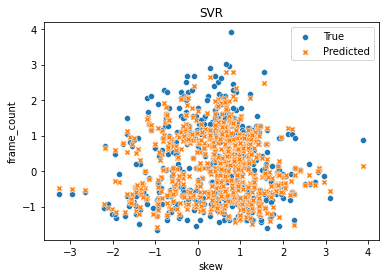

In [70]:
sns.scatterplot(data=df_test, x="skew", y="frame_count", label="True")
sns.scatterplot(data=df_test, x="skew", y=reg.predict(X_test), label="Predicted", marker="X")
plt.title('SVR')
plt.legend()
plt.show()

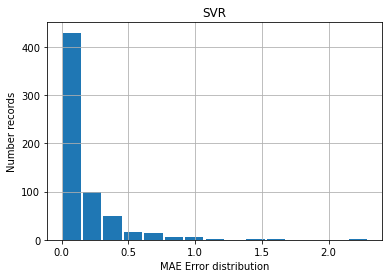

In [71]:
res = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
actual = res["Actual"]
prediction = res["Predicted"]
mean = abs(actual - prediction)
plt.hist(mean, bins=15, rwidth=0.9)
plt.xlabel("MAE Error distribution")
plt.ylabel("Number records")
plt.title('SVR')
plt.grid()
plt.show()

In [72]:
reg = AdaBoostRegressor(random_state=0, n_estimators=100, loss='square')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.938
MSE: 0.064
MAE: 0.187


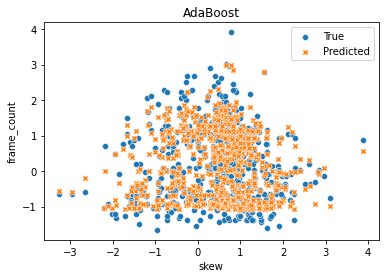

In [73]:
sns.scatterplot(data=df_test, x="skew", y="frame_count", label="True")
sns.scatterplot(data=df_test, x="skew", y=reg.predict(X_test), label="Predicted", marker="X")
plt.title('AdaBoost')
plt.legend()
plt.show()

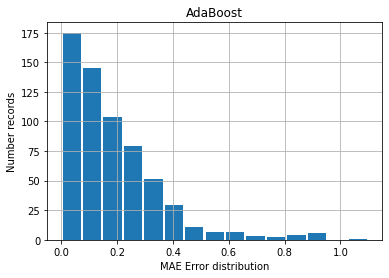

In [74]:
res = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
actual = res["Actual"]
prediction = res["Predicted"]
mean = abs(actual - prediction)
plt.hist(mean, bins=15, rwidth=0.9)
plt.xlabel("MAE Error distribution")
plt.ylabel("Number records")
plt.title('AdaBoost')
plt.grid()
plt.show()

In [83]:
clf = GradientBoostingRegressor(n_estimators=100, 
                                 learning_rate=1.0, max_depth=10, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))



R2: 0.840
MSE: 0.163
MAE: 0.300


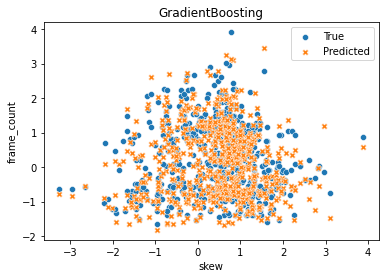

In [84]:
sns.scatterplot(data=df_test, x="skew", y="frame_count", label="True")
sns.scatterplot(data=df_test, x="skew", y=clf.predict(X_test), label="Predicted", marker="X")
plt.title('GradientBoosting')
plt.legend()
plt.show()

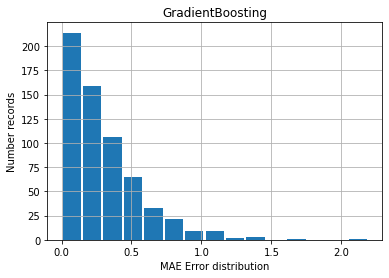

In [85]:
res = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
actual = res["Actual"]
prediction = res["Predicted"]
mean = abs(actual - prediction)
plt.hist(mean, bins=15, rwidth=0.9)
plt.xlabel("MAE Error distribution")
plt.ylabel("Number records")
plt.title('GradientBoosting')
plt.grid()
plt.show()

In [78]:
clf=RandomForestRegressor(criterion='squared_error',n_estimators=50)
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }
grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

In [79]:
grid_search.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2}

In [80]:
y_pred = clf.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.920
MSE: 0.082
MAE: 0.193


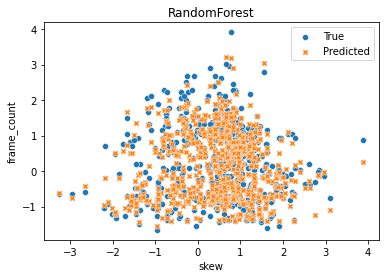

In [81]:
sns.scatterplot(data=df_test, x="skew", y="frame_count", label="True")
sns.scatterplot(data=df_test, x="skew", y=clf.predict(X_test), label="Predicted", marker="X")
plt.title('RandomForest')
plt.legend()
plt.show()

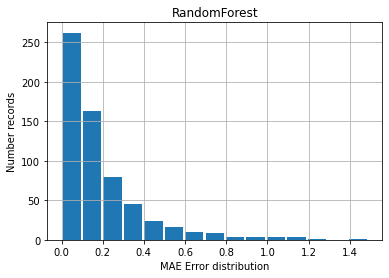

In [82]:
res = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
actual = res["Actual"]
prediction = res["Predicted"]
mean = abs(actual - prediction)
plt.hist(mean, bins=15, rwidth=0.9)
plt.xlabel("MAE Error distribution")
plt.ylabel("Number records")
plt.title('RandomForest')
plt.grid()
plt.show()